# General information

## Dataset

## Features
**Units**
- ppm: parts per million
- μg/L: microgram per litre
- mg/L: milligram per litre

**Columns**
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## Findings

## Goal
Determine if water is safe for human consumption or not.

## Source
https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
data = pd.read_csv("./datasets/water_potability.csv")

# Analysis

## Findings
* Small negative correlation of sulfate <-> solid
* Null values for categories:
    * ph
    * Sulfate
    * Trihalemothanes
* Zero duplicates


In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [18]:
corr_matrix = data.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [16]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [45]:
def top_5_corr(dataframe):
    columns = dataframe.columns
    corr_matrix = dataframe.corr()
    for col in columns:
        print(f"{col} - Top Candidates \n{corr_matrix[col].loc[lambda x: (x > 0.1) | (x < -0.1)]}) \n")
    

In [46]:
top_5_corr(data)

ph - Top Candidates 
ph    1.0
Name: ph, dtype: float64) 

Hardness - Top Candidates 
Hardness    1.000000
Sulfate    -0.106923
Name: Hardness, dtype: float64) 

Solids - Top Candidates 
Solids     1.000000
Sulfate   -0.171804
Name: Solids, dtype: float64) 

Chloramines - Top Candidates 
Chloramines    1.0
Name: Chloramines, dtype: float64) 

Sulfate - Top Candidates 
Hardness   -0.106923
Solids     -0.171804
Sulfate     1.000000
Name: Sulfate, dtype: float64) 

Conductivity - Top Candidates 
Conductivity    1.0
Name: Conductivity, dtype: float64) 

Organic_carbon - Top Candidates 
Organic_carbon    1.0
Name: Organic_carbon, dtype: float64) 

Trihalomethanes - Top Candidates 
Trihalomethanes    1.0
Name: Trihalomethanes, dtype: float64) 

Turbidity - Top Candidates 
Turbidity    1.0
Name: Turbidity, dtype: float64) 

Potability - Top Candidates 
Potability    1.0
Name: Potability, dtype: float64) 



<Axes: >

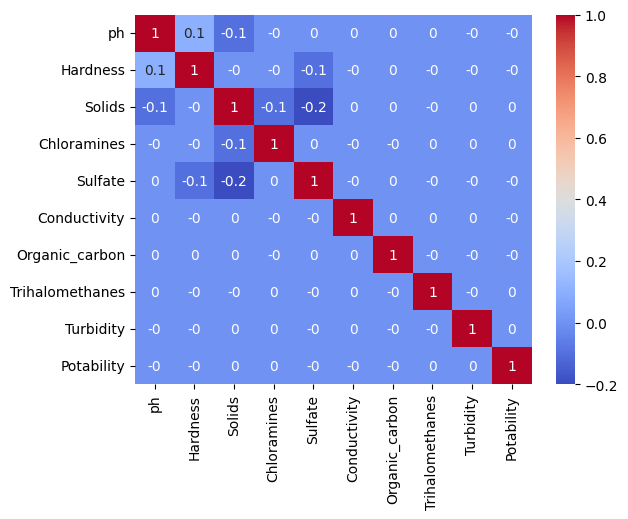

In [48]:
sns.heatmap(round(corr_matrix,1), annot=True, cmap="coolwarm")

<Axes: xlabel='Sulfate', ylabel='Solids'>

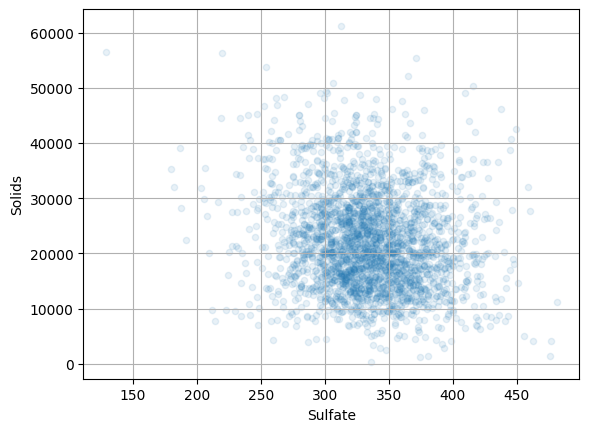

In [52]:
data.plot(kind="scatter", x="Sulfate", y="Solids", alpha=0.1, grid=True)

<Axes: xlabel='ph', ylabel='Hardness'>

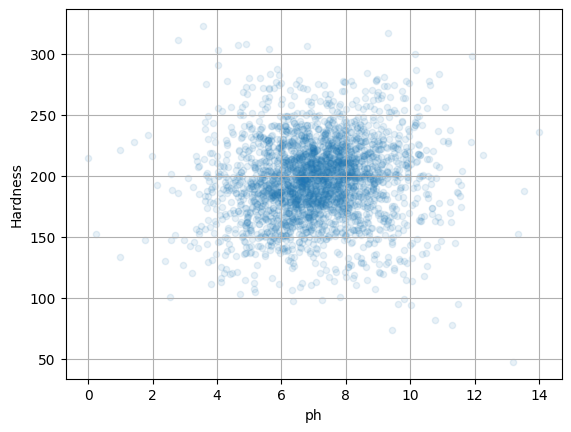

In [53]:
data.plot(kind="scatter", x="ph", y="Hardness", alpha=0.1,grid=True)

In [ ]:
data.plot(kind="scatter", x="ph", y="Hardness", alpha=0.1,grid=True)

In [58]:
num_of_duplicates = abs(len(data) - len(data.duplicated()))
num_of_duplicates

0

# Data preparation

## Create training and test set

In [212]:
data_copy = data.copy(deep=True)
y = data_copy["Potability"]
X = data_copy.drop("Potability", axis=1)

In [213]:
print(y.shape)
print(X.shape)

(3276,)
(3276, 9)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

## Set missing null values to some value, using imputation

### Impute training set

In [214]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(X)

SimpleImputer(strategy='median')

In [215]:
imputer.feature_names_in_

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype=object)

In [216]:
imputer.statistics_

array([7.03675210e+00, 1.96967627e+02, 2.09278336e+04, 7.13029897e+00,
       3.33073546e+02, 4.21884968e+02, 1.42183379e+01, 6.66224851e+01,
       3.95502756e+00])

In [217]:
X = imputer.transform(X)

In [218]:
X = pd.DataFrame(X, columns=imputer.feature_names_in_)

In [219]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [221]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 2947 to 601
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               656 non-null    float64
 1   Hardness         656 non-null    float64
 2   Solids           656 non-null    float64
 3   Chloramines      656 non-null    float64
 4   Sulfate          656 non-null    float64
 5   Conductivity     656 non-null    float64
 6   Organic_carbon   656 non-null    float64
 7   Trihalomethanes  656 non-null    float64
 8   Turbidity        656 non-null    float64
dtypes: float64(9)
memory usage: 51.2 KB


# Training the models

## Logistic regression model

In [222]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
233,6.623614,203.030141,17167.301297,6.049601,311.726288,410.243247,15.914500,65.021229,2.915166
831,6.684700,193.840931,34157.184474,9.876574,344.535407,498.063996,8.818757,66.659352,4.030660
2658,6.836060,205.667718,18321.327502,6.712854,297.837188,494.484249,13.808923,70.714225,4.952508
2495,7.036752,183.488839,12675.938962,9.777807,319.870584,482.445026,13.309723,46.853410,3.240419
2603,6.406798,182.885137,17851.064021,7.462758,332.486731,398.779746,17.301617,64.070236,4.573968


In [223]:
from sklearn.linear_model import LogisticRegression
lin_alg = LogisticRegression(random_state=42, max_iter=100).fit(X_train,y_train)
lin_alg_2 = LogisticRegression()

In [143]:
lin_alg.score(X_test, y_test)

0.6280487804878049

In [224]:
lin_alg.score(X_test, y_test)

0.6280487804878049

In [148]:
from sklearn.model_selection import cross_val_score

In [372]:
cross_val_lg1 = cross_val_score(LogisticRegression(random_state=42, max_iter=100), selected_X,y,cv=10)
cross_val_lg1

/Users/chams/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 ,
       0.6097561 , 0.6116208 , 0.6116208 , 0.60856269, 0.60856269])

In [145]:
X.shape

(3276, 9)

In [146]:
y.shape

(3276,)

## Decision Tree Classifier

In [225]:
from sklearn.tree import DecisionTreeClassifier


In [226]:
dtc = DecisionTreeClassifier()

In [227]:
cross_val_scores = cross_val_score(dtc, X, y, cv=10)

In [228]:
cross_val_scores

array([0.54573171, 0.53353659, 0.63719512, 0.54878049, 0.56402439,
       0.52134146, 0.50764526, 0.59021407, 0.56269113, 0.5412844 ])

In [371]:
cross_val_dtc = cross_val_score(DecisionTreeClassifier(), selected_X, y, cv=10)
cross_val_dtc

array([0.52743902, 0.56097561, 0.54573171, 0.54878049, 0.54268293,
       0.57621951, 0.5412844 , 0.55351682, 0.56880734, 0.53211009])

## Random Forest Classifier

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [245]:
cvs_clf = cross_val_score(clf, X,y,cv=10)

In [246]:
cvs_clf

array([0.62804878, 0.61890244, 0.62804878, 0.62804878, 0.63109756,
       0.59146341, 0.59633028, 0.6146789 , 0.63302752, 0.6146789 ])

## Support Vector Classifier

In [234]:
from sklearn.svm import SVC


In [239]:
svc = SVC()

In [241]:
cvs_svc = cross_val_score(svc, X,y,cv=10)

In [243]:
cvs_svc

array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 ,
       0.6097561 , 0.6116208 , 0.6116208 , 0.60856269, 0.60856269])

In [370]:
cvs_svc2 = cross_val_score(SVC(), selected_X,y,cv=10)
cvs_svc2

array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 ,
       0.6097561 , 0.6116208 , 0.6116208 , 0.60856269, 0.60856269])

## Stochastic Gradient descent

In [248]:
from sklearn.linear_model import SGDClassifier

In [260]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=200)

In [261]:
sgd = sgd.fit(X_train, y_train)

In [262]:
sgd.score(X_test, y_test)

0.6280487804878049

In [265]:
cross_val_sgd = cross_val_score(SGDClassifier(loss="hinge", penalty="l2", max_iter=200), X,y, cv=15)

In [266]:
cross_val_sgd

array([0.38812785, 0.38812785, 0.38812785, 0.60730594, 0.60730594,
       0.60730594, 0.61009174, 0.61926606, 0.38990826, 0.61009174,
       0.61009174, 0.39908257, 0.61009174, 0.3853211 , 0.61009174])

In [368]:
cross_val_sgd = cross_val_score(SGDClassifier(loss="hinge", penalty="l2", max_iter=300), selected_X,y, cv=10)

In [369]:
cross_val_sgd

array([0.6097561 , 0.6097561 , 0.6097561 , 0.6097561 , 0.3902439 ,
       0.6097561 , 0.6116208 , 0.60856269, 0.39143731, 0.60856269])

## Multilayer perceptron

In [267]:
from sklearn.neural_network import MLPClassifier

In [268]:
mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

In [269]:
mlp = mlp.fit(X_train,y_train)

In [270]:
mlp.score(X_test,y_test)

0.6280487804878049

## Adaptive Boost Classifier

In [271]:
from sklearn.ensemble import AdaBoostClassifier

In [272]:
abc = AdaBoostClassifier(random_state=42)

In [274]:
abc = abc.fit(X_train,y_train)

In [275]:
abc.score(X_test,y_test)

0.6204268292682927

In [360]:
cross_val_abc = cross_val_score(AdaBoostClassifier(random_state=42), selected_X,y,cv=10)
cross_val_abc

array([0.61280488, 0.61890244, 0.68597561, 0.64329268, 0.63109756,
       0.5152439 , 0.51681957, 0.6146789 , 0.63302752, 0.56880734])

## Naive Bayes

In [276]:
from sklearn.naive_bayes import GaussianNB

In [277]:
gnb = GaussianNB().fit(X_train,y_train)

In [278]:
gnb.score(X_test, y_test)

0.6280487804878049

In [361]:
cross_val_nb = cross_val_score(GaussianNB(), selected_X,y,cv=10)
cross_val_nb

array([0.60365854, 0.63414634, 0.70426829, 0.64329268, 0.65243902,
       0.50304878, 0.52293578, 0.64525994, 0.64525994, 0.57186544])

In [385]:
print(np.sort(cross_val_nb))

[0.50304878 0.52293578 0.57186544 0.60365854 0.63414634 0.64329268
 0.64525994 0.64525994 0.65243902 0.70426829]


## Information Gain

In [331]:
from sklearn.feature_selection import mutual_info_classif

In [333]:
importances = mutual_info_classif(X,y)

In [334]:
data_copy.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [335]:
feat_importances = pd.Series(importances, data_copy.columns[0:len(data_copy.columns)-1])

<Axes: >

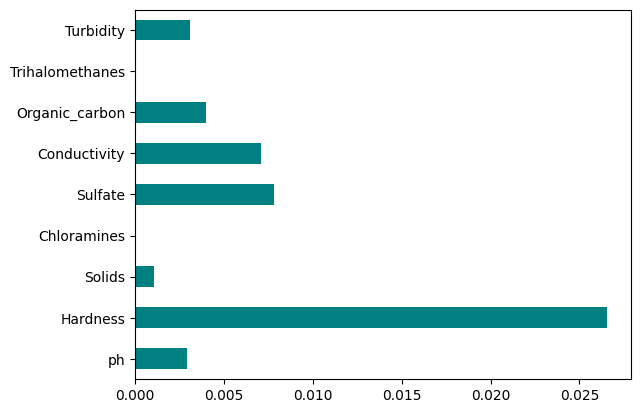

In [336]:
feat_importances.plot(kind="barh", color = "teal")

## Feature selection

In [392]:
selected_X2 = X.copy().drop(["Chloramines", "Trihalomethanes","Solids","ph"], axis=1)

In [353]:
selected_X = X.copy().drop(["Chloramines", "Trihalomethanes","Solids"], axis=1)

In [354]:
X_train, X_test, y_train, y_test = train_test_split(selected_X,y, random_state=42, test_size=0.2)

In [355]:
X_train.head()

,ph,Hardness,Sulfate,Conductivity,Organic_carbon,Turbidity
233,6.623614,203.030141,311.726288,410.243247,15.914500,2.915166
831,6.684700,193.840931,344.535407,498.063996,8.818757,4.030660
2658,6.836060,205.667718,297.837188,494.484249,13.808923,4.952508
2495,7.036752,183.488839,319.870584,482.445026,13.309723,3.240419
2603,6.406798,182.885137,332.486731,398.779746,17.301617,4.573968


In [350]:
new_rfc = RandomForestClassifier(max_depth=5, random_state=0)

In [351]:
cross_val_rfc = cross_val_score(new_rfc,selected_X,y, cv=10)

In [352]:
cross_val_rfc

array([0.6097561 , 0.62195122, 0.64939024, 0.6402439 , 0.6554878 ,
       0.58841463, 0.60856269, 0.62385321, 0.62996942, 0.62996942])

In [359]:
new_rfc2 = RandomForestClassifier(max_depth=5, random_state=0)
cross_val_rfc2 = cross_val_score(new_rfc,selected_X,y, cv=10)
cross_val_rfc2

array([0.625     , 0.62804878, 0.64634146, 0.64634146, 0.65243902,
       0.54268293, 0.58103976, 0.62691131, 0.64831804, 0.62079511])

In [388]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### With all the features

In [390]:
mod = []
cv_score=[]
model =[LogisticRegression(max_iter=1500),AdaBoostClassifier(),RandomForestClassifier(max_depth=5, random_state=0), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X, y, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
6,ExtraTreeClassifier(),0.539389
7,KNeighborsClassifier(),0.555246
5,DecisionTreeClassifier(),0.583336
1,AdaBoostClassifier(),0.593715
3,BaggingClassifier(),0.605619
0,LogisticRegression(max_iter=1500),0.609890
4,GradientBoostingClassifier(),0.613260
2,"RandomForestClassifier(max_depth=5, random_state=0)",0.628821


### Without "Chloramines", "Trihalomethanes","Solids"

In [391]:
mod = []
cv_score=[]
model =[LogisticRegression(max_iter=1500),AdaBoostClassifier(),RandomForestClassifier(max_depth=5, random_state=0), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, selected_X, y, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
5,DecisionTreeClassifier(),0.547622
6,ExtraTreeClassifier(),0.551587
7,KNeighborsClassifier(),0.562276
1,AdaBoostClassifier(),0.601954
3,BaggingClassifier(),0.605314
0,LogisticRegression(max_iter=1500),0.609585
2,"RandomForestClassifier(max_depth=5, random_state=0)",0.623327
4,GradientBoostingClassifier(),0.627298


### without "ph" values

In [393]:
mod = []
cv_score=[]
model =[LogisticRegression(max_iter=1500),AdaBoostClassifier(),RandomForestClassifier(max_depth=5, random_state=0), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, selected_X2, y, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
5,DecisionTreeClassifier(),0.520462
6,ExtraTreeClassifier(),0.531138
7,KNeighborsClassifier(),0.561668
3,BaggingClassifier(),0.585173
4,GradientBoostingClassifier(),0.599827
1,AdaBoostClassifier(),0.604395
0,LogisticRegression(max_iter=1500),0.609890
2,"RandomForestClassifier(max_depth=5, random_state=0)",0.611419


## Chi-square Test

In [337]:
from sklearn.feature_selection import SelectKBest, chi2

In [339]:
chi2_features = SelectKBest(chi2, k=5)
X_kbest_features = chi2_features.fit_transform(X,y)

In [340]:
print("Original feature number: ", X.shape[1])
print("Reduced feature number: ", X_kbest_features.shape[1])

Original feature number:  9
Reduced feature number:  5


In [394]:
y.value_counts() / len(y)

Potability
0    0.60989
1    0.39011
Name: count, dtype: float64